**Prodigy Intership**

*   Machine Learning
*   Task 02 - Create Cluster Using K-means
---
Done By : Yasmeen Toukhy

---







In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline
from sklearn.cluster import KMeans
import os
import warnings
warnings.simplefilter("ignore")

**Analyzing data**

In [3]:
dataSet=pd.read_csv('Mall_Customers.csv')
dataSet.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
dataSet.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataSet.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
dataSet.rename(index=str, columns={'Annual Income (k$)': 'Annual_Income',
                            'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

**Visualizating**

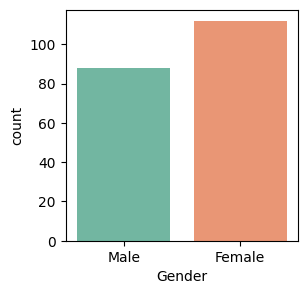

In [8]:
plt.figure(1 , figsize = (3 , 3))
sns.countplot(x = 'Gender' , data = dataSet, palette='Set2')
plt.show()

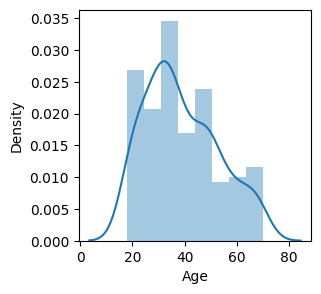

In [9]:
plt.figure(figsize=(3,3))
sns.distplot(dataSet["Age"])
plt.xlabel("Age")
plt.show()

In [10]:
# Replace Male with 0 & Female with 1
dataSet['Gender'] = dataSet['Gender'].map({'Male': 0, 'Female': 1})
dataSet.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


**Cluster**

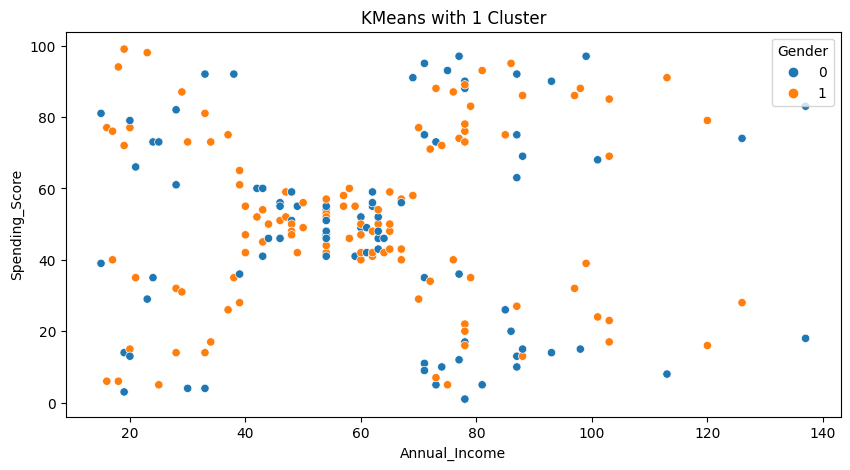

In [16]:
# 1 cluster
km1 = KMeans(n_clusters=1).fit(dataSet)

# Plot the data
plt.figure(figsize=(10,5))
sns.scatterplot(x=dataSet['Annual_Income'], y=dataSet['Spending_Score'], hue=dataSet['Gender'])
plt.title('KMeans with 1 Cluster')
plt.show()

In [17]:
Added_Data=dataSet.drop(['CustomerID','Gender'], axis=1)
Added_Data.head()

,Age,Annual_Income,Spending_Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# Clustering new data that contains Age, Annual income & Spending Score



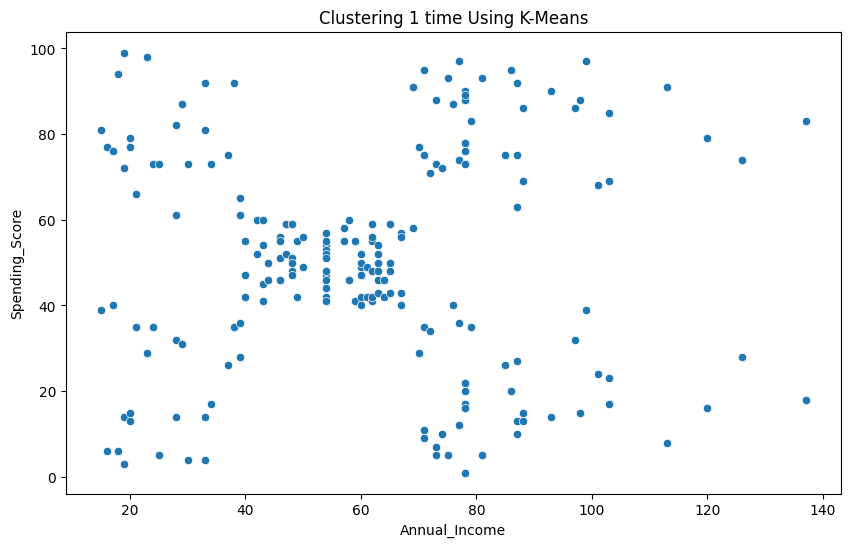

In [36]:
km1 = KMeans(n_clusters = 1).fit(Added_Data)

Added_Data['Labels'] = km1.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(x = Added_Data['Annual_Income'], y = Added_Data['Spending_Score'])
plt.title('Clustering 1 time Using K-Means')
plt.show()

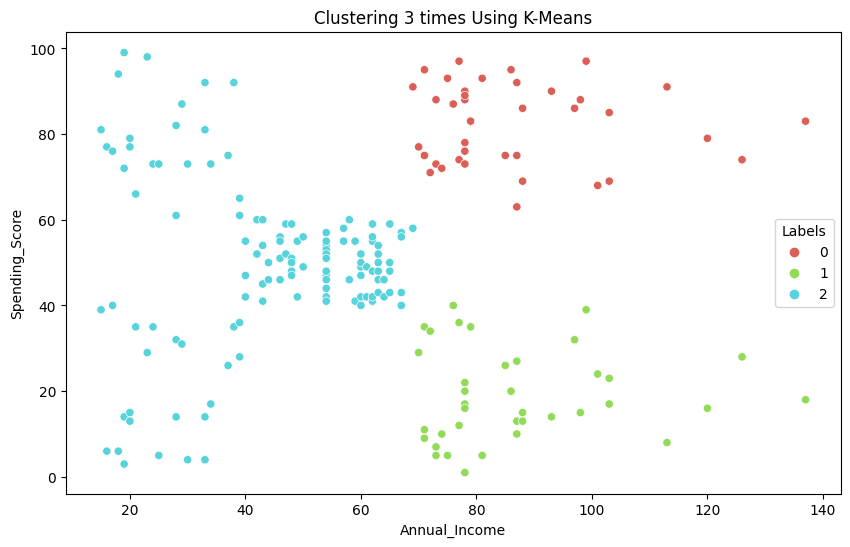

In [ ]:
km3 = KMeans(n_clusters=3).fit(Added_Data)

Added_Data['Labels'] = km3.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x = Added_Data['Annual_Income'], y = Added_Data['Spending_Score'], hue=Added_Data['Labels'],
                palette=sns.color_palette('hls', 4))
plt.title('Clustering 3 times Using K-Means')
plt.show()

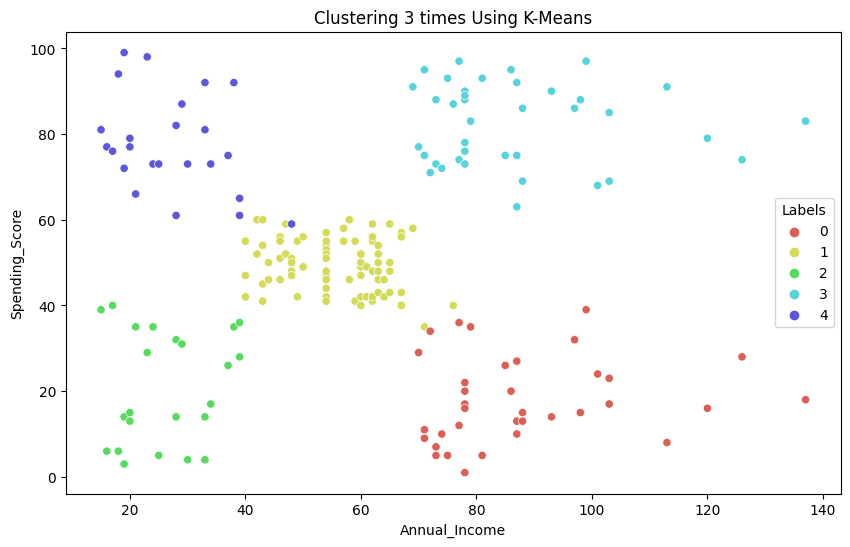

In [40]:
km5 = KMeans(n_clusters=5).fit(Added_Data)
Added_Data['Labels'] = km5.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(x = Added_Data['Annual_Income'], y = Added_Data['Spending_Score'], hue=Added_Data['Labels'],
                palette=sns.color_palette('hls', 6))
plt.title('Clustering 5 times Using K-Means')
plt.show()

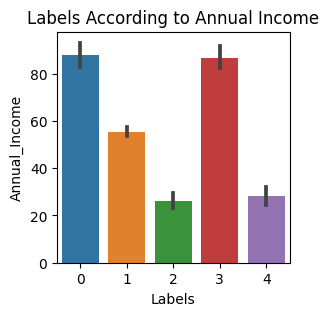

In [42]:
fig, axes = plt.subplots(figsize=(3, 3))
# Bar plot for Annual Income
sns.barplot(x='Labels', y='Annual_Income', data=Added_Data)
axes.set_title('Labels According to Annual Income')
plt.show()

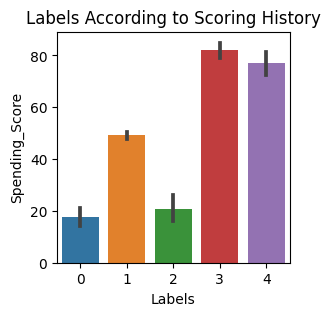

In [44]:
# Bar plot for Scoring History
fig, axes = plt.subplots(figsize=(3, 3))
sns.barplot(x='Labels', y='Spending_Score', data=Added_Data)
axes.set_title('Labels According to Scoring History')
plt.show()